In [2]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import numpy as np
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.keras.backend.set_session(tf.Session(config=config))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
cifar = tf.keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar.load_data()

(50000, 32, 32, 3)
[31]


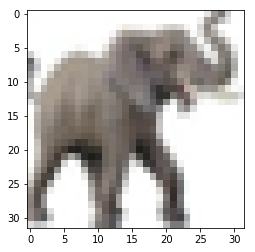

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0
print (x_train.shape)

import matplotlib.pyplot as plt
%matplotlib inline
print(y_train[9])
plt.imshow(x_train[9])


In [10]:
import tensorflow as tf
from keras.applications import ResNet50 as ResNet50
from keras.optimizers import Adam as Adam

model = ResNet50(
    input_shape=x_train[0].shape,
    include_top=True,
    weights=None,
    classes=len(np.unique(y_train))
)


In [11]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [12]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)



Epoch 1/10
50000/50000 [==============================] - 82s 2ms/step - loss: 4.6104 - accuracy: 0.0000e+00
Epoch 2/10
50000/50000 [==============================] - 75s 2ms/step - loss: 4.6112 - accuracy: 0.0000e+00
Epoch 3/10
50000/50000 [==============================] - 76s 2ms/step - loss: 4.6122 - accuracy: 0.0000e+00
Epoch 4/10
50000/50000 [==============================] - 77s 2ms/step - loss: 4.6122 - accuracy: 0.0000e+00
Epoch 5/10
50000/50000 [==============================] - 77s 2ms/step - loss: 4.6122 - accuracy: 0.0000e+00
Epoch 6/10
50000/50000 [==============================] - 77s 2ms/step - loss: 4.6122 - accuracy: 0.0000e+00
Epoch 7/10
50000/50000 [==============================] - 77s 2ms/step - loss: 4.6122 - accuracy: 0.0000e+00
Epoch 8/10
50000/50000 [==============================] - 77s 2ms/step - loss: 4.6122 - accuracy: 0.0000e+00
Epoch 9/10
34848/50000 [===================>..........] - ETA: 23s - loss: 4.6127 - accuracy: 0.0000e+00

In [16]:
model.save_weights("resnet50.model")



In [22]:
# print(dir(model))
x,y= x_test[:10],y_test[:10]

results = model.evaluate(x, y, batch_size=128)
print("test loss, test acc:", results)

predictions = model.predict(x_test[:3])
# print (predictions)
print(np.argmax(predictions,axis=1))
# print(predictions)
print (y_test[:3])

# print("predictions shape:", predictions.shape)

# print(y) 
# y = model.predict(x_test[:10])-y_test[:10]

# print(y_test[:10].shape)
# print(y[:10].shape)
# print(y_test[9])
# plt.imshow(x_test[9])
# print(y[9])
# model.evaluate(x_test,  y_test, verbose=2)


10/10 [==============================] - 0s 1ms/step
test loss, test acc: [4.622207164764404, 0.0]
[31 31 31]
[[49]
 [33]
 [72]]


In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.datasets import cifar100
import tensorflow as tf
import datetime
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
tf.keras.backend.set_session(tf.Session(config=config))

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
x_train, x_test = x_train / 255, x_test / 255 # normalize data


x_train = x_train
y_train = y_train

x_test = x_test
y_test = y_test

model = ResNet50(input_shape=x_train.shape[1:], weights=None)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'])
model.load_weights("resnet50.model")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="log")

log_dir = "log"

model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_test, y_test),
    callbacks = [tensorboard_callback]
)
model.save_weights("resnet50.model")



Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 89s 2ms/step - loss: 2.1744 - accuracy: 0.4195 - val_loss: 2.7209 - val_accuracy: 0.3519
Epoch 2/100
50000/50000 [==============================] - 82s 2ms/step - loss: 2.0298 - accuracy: 0.4507 - val_loss: 2.8925 - val_accuracy: 0.3474
Epoch 3/100
50000/50000 [==============================] - 82s 2ms/step - loss: 1.9588 - accuracy: 0.4681 - val_loss: 2.5744 - val_accuracy: 0.3620
Epoch 4/100
50000/50000 [==============================] - 82s 2ms/step - loss: 1.7940 - accuracy: 0.5011 - val_loss: 2.5521 - val_accuracy: 0.3829
Epoch 5/100
50000/50000 [==============================] - 82s 2ms/step - loss: 1.5921 - accuracy: 0.5476 - val_loss: 3.4074 - val_accuracy: 0.3503
Epoch 6/100
50000/50000 [==============================] - 82s 2ms/step - loss: 1.5725 - accuracy: 0.5522 - val_loss: 6.7303 - val_accuracy: 0.2320
Epoch 7/100
50000/50000 [==============================] - 82

In [15]:
import numpy as np
r = model.predict(x_test[:10])
# model
print(np.argmax(r,axis=1))
print(y_test[:10].T[0])

[12 33 15 21 71  6 15  3 23 83]
[49 33 72 51 71 92 15 14 23  0]
